In [2]:
import numpy as np 
import matplotlib.pyplot as plt 
import sys 

sys.path.append("../classes/")

import Physics
import LookupTable
import Tile
import TileArray

plt.style.use("~/evanstyle.mplstyle")

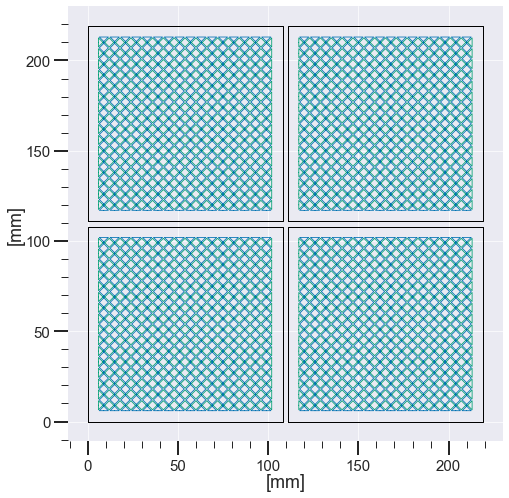

In [9]:
pitch = 6.0 #mm 
gap = 0.7 #mm
bridge_wid = 0.05 #mm
N = 16
tile_rim = 6 #mm
tile_gap = 3 #mm
tile_length = N*pitch + 2*tile_rim
tile_shift = tile_length + tile_gap

t = Tile.Tile(pitch, gap, N, tile_rim, bridge_wid)
tarr = TileArray.TileArray(t, 2, 2, tile_gap)
tarr.build_array()
tarr.plot_array()

In [85]:
tab = LookupTable.LookupTable(tarr)
tab.setup_discretization(50, 50, -100, [-1, -50], 'bulk')
tab.generate_lookup_table(380, gaussian=False, N_ann=9)

On coordinate 0 of 2500
On coordinate 10 of 2500
On coordinate 20 of 2500
On coordinate 30 of 2500
On coordinate 40 of 2500
On coordinate 50 of 2500
On coordinate 60 of 2500
On coordinate 70 of 2500
On coordinate 80 of 2500
On coordinate 90 of 2500
On coordinate 100 of 2500
On coordinate 110 of 2500
On coordinate 120 of 2500
On coordinate 130 of 2500
On coordinate 140 of 2500
On coordinate 150 of 2500
On coordinate 160 of 2500
On coordinate 170 of 2500
On coordinate 180 of 2500
On coordinate 190 of 2500
On coordinate 200 of 2500
On coordinate 210 of 2500
On coordinate 220 of 2500
On coordinate 230 of 2500
On coordinate 240 of 2500
On coordinate 250 of 2500
On coordinate 260 of 2500
On coordinate 270 of 2500
On coordinate 280 of 2500
On coordinate 290 of 2500
On coordinate 300 of 2500
On coordinate 310 of 2500
On coordinate 320 of 2500
On coordinate 330 of 2500
On coordinate 340 of 2500
On coordinate 350 of 2500
On coordinate 360 of 2500
On coordinate 370 of 2500
On coordinate 380 of 25

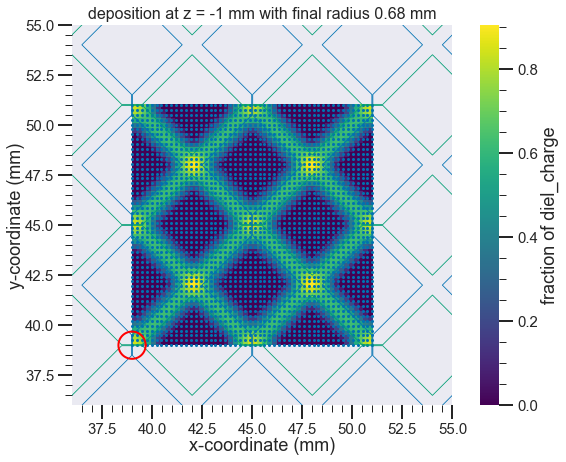

In [86]:
ax = tab.plot_charge_location(0, loc='diel_charge', show=False)
ax.set_xlim([36, 55])
ax.set_ylim([36, 55])
plt.show()

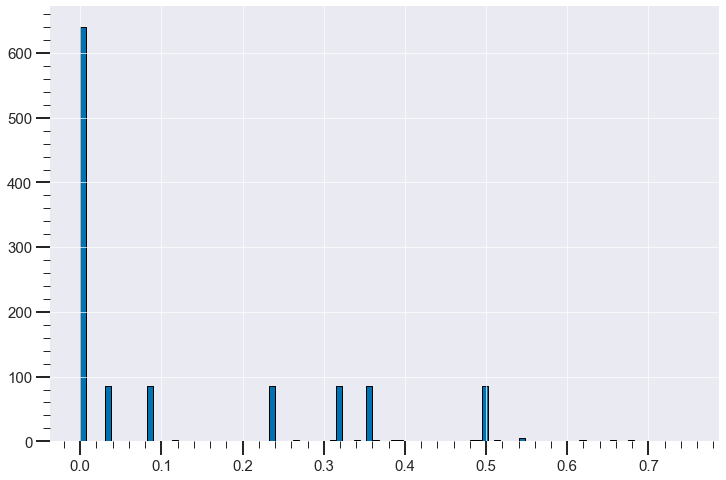

In [75]:
df = tab.get_zslice(0)

#conditioning
lost = df['lost_charge']
lost = [_ for _ in lost if _ > 0 and _ < 0.8]

fig, ax = plt.subplots()
ax.hist(lost)
plt.show()

# Special pretty plotter of tiles

In [1]:
from matplotlib.path import Path
from matplotlib.patches import PathPatch
from matplotlib.collections import PatchCollection


# Plots a Polygon to pyplot `ax`
def plot_polygon(ax, poly, **kwargs):
    path = Path.make_compound_path(
        Path(np.asarray(poly.exterior.coords)[:, :2]),
        *[Path(np.asarray(ring.coords)[:, :2]) for ring in poly.interiors])

    patch = PathPatch(path, **kwargs)
    collection = PatchCollection([patch], **kwargs)
    
    ax.add_collection(collection, autolim=True)
    ax.autoscale_view()
    return collection

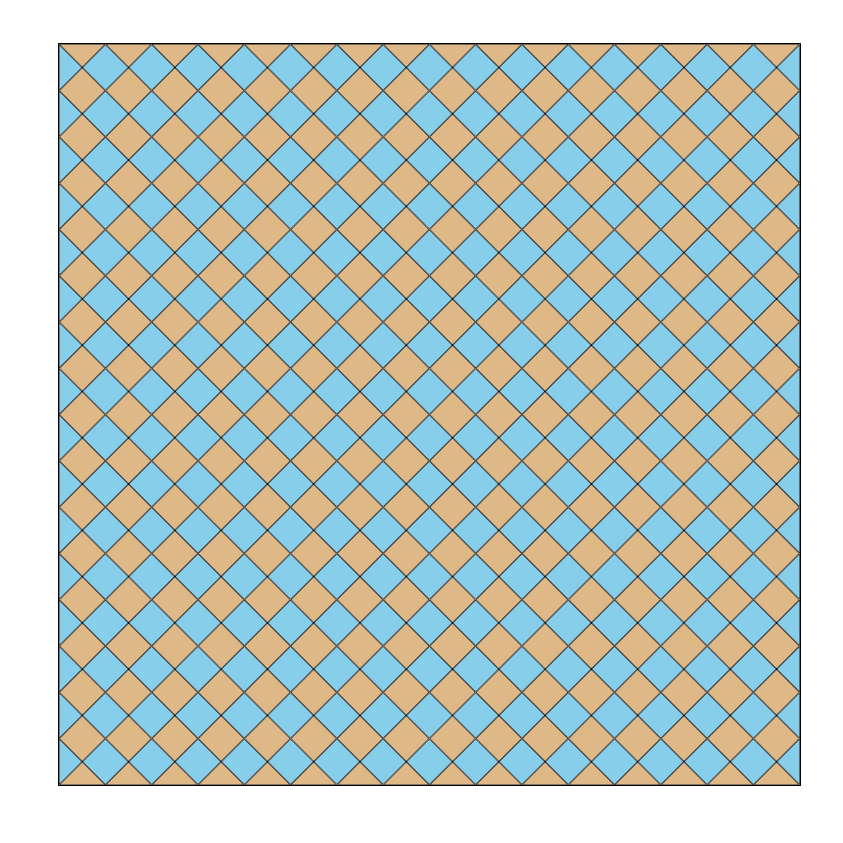

In [19]:
pitch = 6.0 #mm 
gap = 0.085 #mm
bridge_wid = 0.05 #mm
N = 16
tile_rim = 0.05 #mm
tile_gap = 0.8 #mm
tile_length = N*pitch + 2*tile_rim
tile_shift = tile_length + tile_gap

t = Tile.Tile(pitch, gap, N, tile_rim, bridge_wid)
t.build_tile()
xpol = t.x_strip_polys
ypol = t.y_strip_polys
out = t.tile_outline
fig, ax = plt.subplots(figsize=(15, 15))
for k, p in xpol.items():
    plot_polygon(ax, p, facecolor='skyblue', edgecolor='k', linewidth=0.5)

for k, p in ypol.items():
    plot_polygon(ax, p, facecolor='burlywood', edgecolor='k', linewidth=0.5)

plot_polygon(ax, out, edgecolor='k', facecolor='none')

ax.set_aspect('equal')
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
ax.set_facecolor('none')
ax.grid(False)
plt.show()